In [2]:
# imports
%matplotlib inline
import random
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

In [3]:
import open3d as o3d

## Functions

In [4]:
def read_images_to_array(folder_path):

  image_array = []
  # Get a sorted list of filenames
  filenames = sorted(os.listdir(folder_path))
  for filename in filenames:
    if filename.endswith(".jpg") or filename.endswith(".png"):
      img_path = os.path.join(folder_path, filename)
      img = cv2.imread(img_path)

      if img is not None:
        image_array.append(img)

  return image_array

def read_bin_files_to_array(folder_path):
    bin_files = []
    filenames = sorted(os.listdir(folder_path))
    for filename in filenames:
        if filename.endswith('.bin'):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'rb') as file:
                data = np.fromfile(file, dtype=np.float32)
                bin_files.append(data)

    return bin_files


def split_images(image_array): 

    red_region_images = []
    raw_images = [] 

    for image in image_array:
        if image[25,100].sum() == 255*3 :
            red_region_images.append(image)
        else: 
            raw_images.append(image) 
            
    return red_region_images, raw_images

## Apply Functions to Data

In [5]:
folder_path = './data/Invotive_data'
images = read_images_to_array(folder_path)

masks, images = split_images(images) 

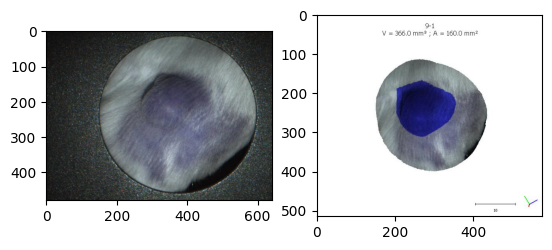

37
37


In [6]:
# sanity check 

rand = random.randint(0, len(images) -1) 
fig, ax = plt.subplots(1,2) 

ax[0].imshow(images[rand])
ax[1].imshow(masks[rand])

plt.show()

print(len(images)) 
print(len(masks))

## Code for bin files 

In [7]:
# get all bin files from folder
bin_files = read_bin_files_to_array(folder_path) 

In [8]:
def read_and_process_point_cloud(file_name):
    # Open the file and read the data
    with open(file_name, 'rb') as fid:
        d = np.fromfile(fid, dtype=np.float32)

    # Reshape the data into a 3-row matrix
    d2 = d.reshape(3, -1)

    # Remove any NaN or Inf values
    valid_mask = np.all(np.isfinite(d2), axis=0)
    d2 = d2[:, valid_mask]

    # Center the data around 0 (optional)
    d2[0, :] -= np.median(d2[0, :])
    d2[1, :] -= np.median(d2[1, :])
    d2[2, :] -= np.median(d2[2, :])

    # Extract x, y, z coordinates
    x = d2[0, :]
    y = d2[1, :]
    z = d2[2, :]

    return x, y, z

In [9]:
import open3d as o3d

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
import random

def read_and_process_point_cloud(file_name):
    # Open the file and read the data
    with open(file_name, 'rb') as fid:
        d = np.fromfile(fid, dtype=np.float32)

    # Reshape the data into a 3-row matrix
    d2 = d.reshape(3, -1)

    # Remove any NaN or Inf values
    valid_mask = np.all(np.isfinite(d2), axis=0)
    d2 = d2[:, valid_mask]

    # Center the data around 0 (optional)
    d2[0, :] -= np.median(d2[0, :])
    d2[1, :] -= np.median(d2[1, :])
    d2[2, :] -= np.median(d2[2, :])

    # Extract x, y, z coordinates
    x = d2[0, :]
    y = d2[1, :]
    z = d2[2, :]

    return x, y, z

In [13]:
# Load the point cloud
bin_files = 'data/Invotive_data/L3.3 Parental 2-Control-1-0-38.bin'
x, y, z = read_and_process_point_cloud(bin_files)


x_unique = np.unique(x)
y_unique = np.unique(y)

x_grid, y_grid = np.meshgrid(x_unique, y_unique)

# Interpolate z values onto the grid
z_grid = griddata((x, y), z, (x_grid, y_grid), method='linear')

# Plotting
ax = plt.axes(projection="3d")
ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis')

plt.show()

: 

In [ ]:
x, y, z = read_and_process_point_cloud('data/Invotive_data/L3.3 Parental 2-Control-1-0-39.bin')
plot_point_cloud(x, y, z)